AOSC484 HW2: Simple coupled Ocean-Atmosphere Model

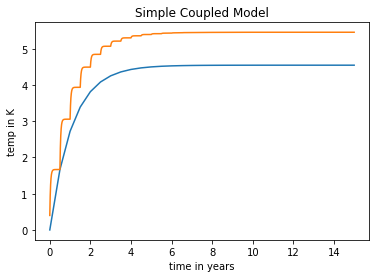

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from multiprocessing import Process, Pipe

#constants
Ra = 20
Ro = 0
Ca = .5
Co = 5
lama = 2
lamo = 2
k = 10 
Ta = 0
To = 0

#functions 
def atmos(T, Foa):
    return (dta/Ca)*(Ra-lama*T+Foa) +T

def ocean(T, Foa):
    return (dto/Co)*(Ro-lamo*T-Foa) +T

#more variables
time = 15
dta = .01
dto = .5
ratio = int(dto/dta) #ocean is 5 times slower than atmosphere in this scenario
Ta_array = np.zeros(int(time/dta)+1)
To_array = np.zeros(int(time/dto)+1)


for t in range(0, int(time/dta)+1):
    Foa = k*(To-Ta)
    if t%ratio == 0: #every 5 atmosphere time steps the ocean gets calculated
        To = ocean(To, Foa)
        To_array[int(t/ratio)] = To
    Ta = atmos(Ta, Foa)
    Ta_array[t] = Ta

        
plt.plot(np.arange(0, time+dto, dto), To_array)
plt.plot(np.arange(0, time+dta, dta), Ta_array)
plt.xlabel("time in years")
plt.ylabel("temp in K")
plt.title("Simple Coupled Model")
plt.show()        

experimenting with the model

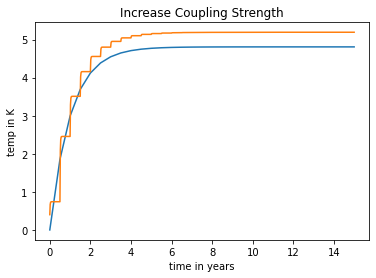

In [12]:
#increase coupling strength k
k = 25 
#reset some vals
Ta = 0
To = 0
Foa = 0

#run model again:
for t in range(0, int(time/dta)+1):
    Foa = k*(To-Ta)
    if t%ratio == 0: 
        To = ocean(To, Foa)
        To_array[int(t/ratio)] = To
    Ta = atmos(Ta, Foa)
    Ta_array[t] = Ta

plt.plot(np.arange(0, time+dto, dto), To_array)
plt.plot(np.arange(0, time+dta, dta), Ta_array)
plt.xlabel("time in years")
plt.ylabel("temp in K")
plt.title("Increase Coupling Strength")
plt.show()

Increasing k has resulted in the oceanic and atmospheric temperatures being closer together. From this, one can infer that if the ocean and atmosphere were able to interact more, the oceans temperature would be higher than it is now (because of global warming). 

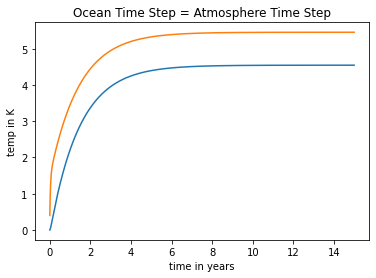

In [13]:
#make oceans delta time same as atmospheres
dto = .01
ratio = 1
Ta_array = np.zeros(int(time/dta)+1)
To_array = np.zeros(int(time/dto)+1)
#reset some vals
Ta = 0
To = 0
Foa = 0
k = 10

#run model again:
for t in range(0, int(time/dta)+1):
    Foa = k*(To-Ta)
    if t%ratio == 0: 
        To = ocean(To, Foa)
        To_array[int(t/ratio)] = To
    Ta = atmos(Ta, Foa)
    Ta_array[t] = Ta

plt.plot(np.arange(0, time+dto, dto), To_array)
plt.plot(np.arange(0, time+dta, dta), Ta_array)
plt.xlabel("time in years")
plt.ylabel("temp in K")
plt.title("Ocean Time Step = Atmosphere Time Step")
plt.show()

When the ocean "moves" as fast as the atmosphere does, the only thing that differs their temperature is their difference in specific heat. (Ocean can absorb more, therefore it stays cooler)

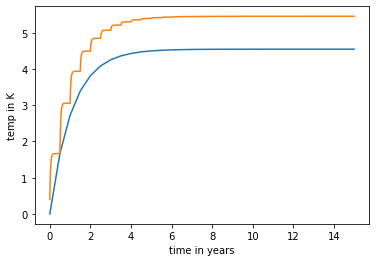

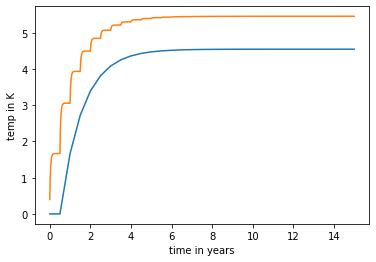

In [14]:
#old and new model side by side
#reset some vals
Ta = 0
To = 0
Foa = 0
dto = .5
ratio = int(dto/dta)
Ta_array = np.zeros(int(time/dta)+1)
To_array = np.zeros(int(time/dto)+1)

for t in range(0, int(time/dta)+1):
    Foa = k*(To-Ta)
    if t%ratio == 0:
        To = ocean(To, Foa)
        To_array[int(t/ratio)] = To
    Ta = atmos(Ta, Foa)
    Ta_array[t] = Ta

plt.plot(np.arange(0, time+dto, dto), To_array)
plt.plot(np.arange(0, time+dta, dta), Ta_array)
plt.xlabel("time in years")
plt.ylabel("temp in K")
plt.show()

#reset some vals
Ta = 0
To = 0
Foa = 0


#old way wich in O(n^2): 
for o in range(0, int(time/dto)):
    To_array[o] = To
    To = ocean(To, Foa)
    for a in range(0, int(dto/dta)):
        i = o*(int(dto/dta))+a #need this index
        Ta = atmos(Ta, Foa)
        Ta_array[i] = Ta
        Foa = k*(To-Ta)

plt.plot(np.arange(0, time+dto, dto), To_array)
plt.plot(np.arange(0, time+dta, dta), Ta_array)
plt.xlabel("time in years")
plt.ylabel("temp in K")
plt.show()

Here I compared the old way of computing the numbers (nested for loops) and the new way (one for loop, using mod) I thought that the graphs should be the same, but they aren't. Is the difference caused by me or something else that we haven't considered?   

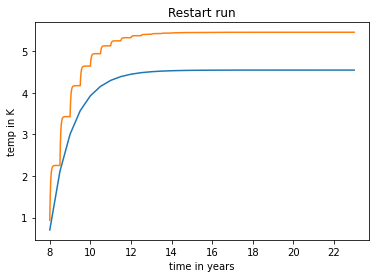

In [15]:
#find where temperatures reach equilibrium (spin up)
prev = -1
equil = -1
val = -1
for y in range (int(time/dto)):
    if To_array[y] == prev:
        equil = y
        break
    prev = To_array[y]

#reset/ set some variables
Ta = Ta_array[equil]
To = prev
dto = .5
ratio = int(dto/dta) 
Ta_array = np.zeros(int(time/dta)+1)
To_array = np.zeros(int(time/dto)+1)

#restart run using the equilibrium point
for t in range(equil-1, int(time/dta)+1):
    Foa = k*(To-Ta)
    if t%ratio == 0: 
        To = ocean(To, Foa)
        To_array[int(t/ratio)] = To
    Ta = atmos(Ta, Foa)
    Ta_array[t] = Ta

plt.plot(np.arange(8, time+dto+8, dto), To_array)
plt.plot(np.arange(8, time+dta+8, dta), Ta_array)
plt.ylabel("temp in K")
plt.xlabel("time in years")
plt.title("Restart run")
plt.show()


The temperatures reach equilibrium after about 8 years. The atmosphere reaches around 5.45K and the ocean reaches about 4.55K. 